In [14]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import yaml
import torch
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
sys.path.append("/home/amisery/SemesterProject")
from data.sfgd_datamodules import SFGD_tagging, NodeCL_dataset, NodeCL_h5dataset
from data.data_utils import *
data_path = "/scratch2/sfgd/sparse_data_genie_fhc_numu_hittag/"

In [24]:
with open("../config/baseline.yaml", "r") as file:
    f = yaml.safe_load(file)

In [26]:
f['model_config']

{'d_model': 64,
 'd_ff': 32,
 'num_heads': 4,
 'num_layers"': 5,
 'n_features"': 4,
 'out_features"': 3}

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
dataset_h5 = NodeCL_h5dataset("/home/amisery/out.h5")

In [4]:
dataset = NodeCL_dataset(data_path)

In [8]:
dataset[0]["values"].all() == dataset_h5[0]["values"].all()

(238, 1)
(238, 3)


tensor(True)

In [ ]:
datamodule = SFGD_tagging(data_path, 4)

In [ ]:
torch.empty(0)

tensor([])

In [ ]:
datamodule.setup("")

In [ ]:
first_batch = next(iter(datamodule.train_dataloader()))

In [ ]:
charge = inv_charge_transform(first_batch["coords"][:,:,3])
print(charge.size())
torch.sum(charge, axis = 1)

tensor([22086.5801, 25487.1367, 21412.1035, 29109.5410])

In [ ]:
labels = first_batch["values"]
random_labels = torch.zeros(labels.size())

for i in range(labels.size()[0]):
    for j in range(labels.size()[1]):
        k = np.random.randint(0,3)
        random_labels[i,j,k] = 1
for i in range(len(labels)):
    true_labels = dataset.enc.inverse_transform(labels[i,first_batch["mask"][0].bool()])
    pred_labels = dataset.enc.inverse_transform(random_labels[i,first_batch["mask"][0].bool()])
    print(confusion_matrix(true_labels, pred_labels, normalize="true"))

[[0.66666667 0.33333333 0.        ]
 [0.27118644 0.40677966 0.3220339 ]
 [0.375      0.25       0.375     ]]
[[0.         0.         0.        ]
 [0.38888889 0.31481481 0.2962963 ]
 [0.3125     0.25       0.4375    ]]
[[0.         1.         0.        ]
 [0.38596491 0.36842105 0.24561404]
 [0.08333333 0.5        0.41666667]]
[[0.         1.         0.        ]
 [0.33333333 0.43137255 0.23529412]
 [0.11111111 0.38888889 0.5       ]]


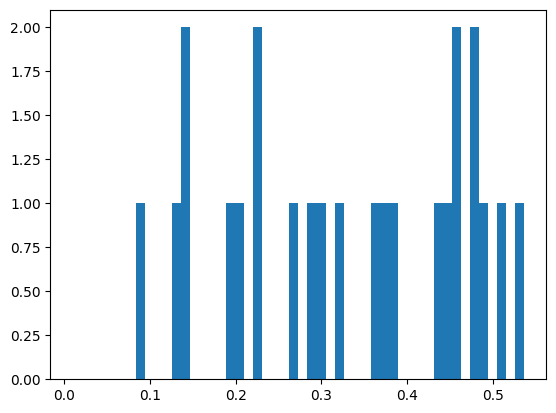

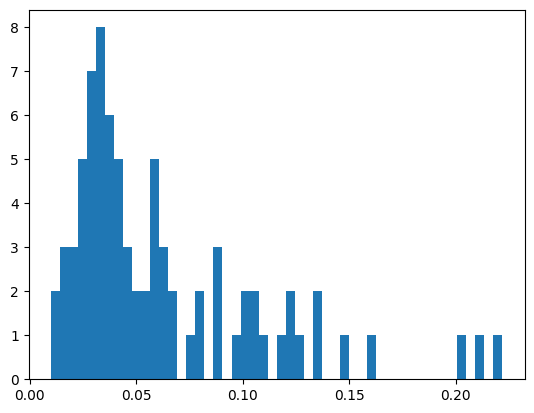

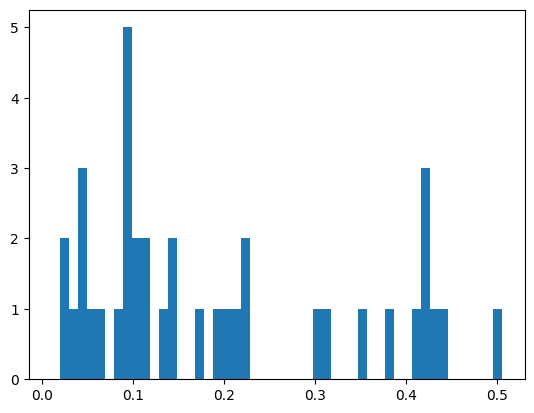

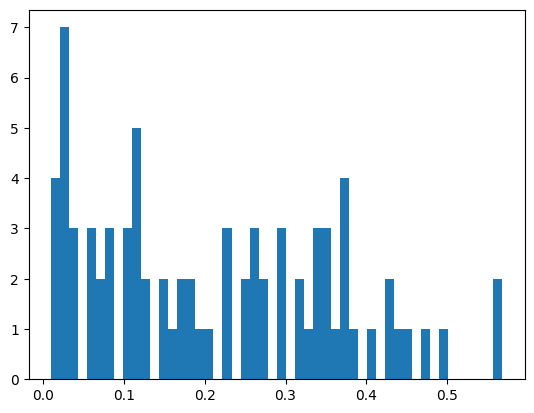

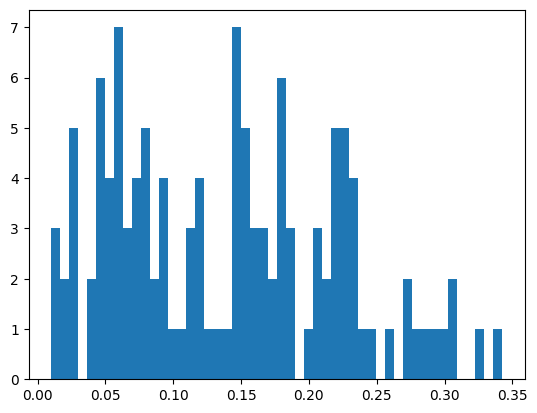

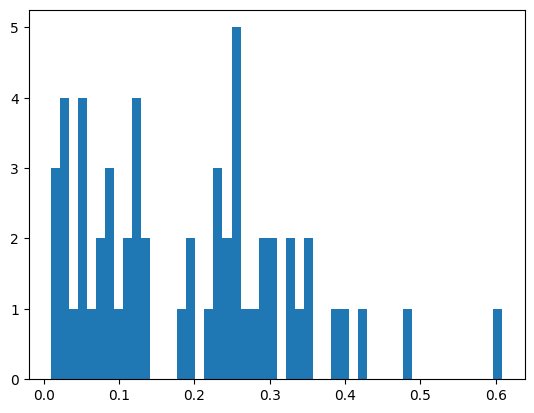

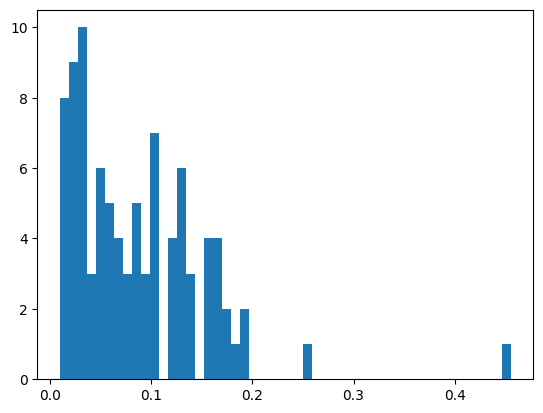

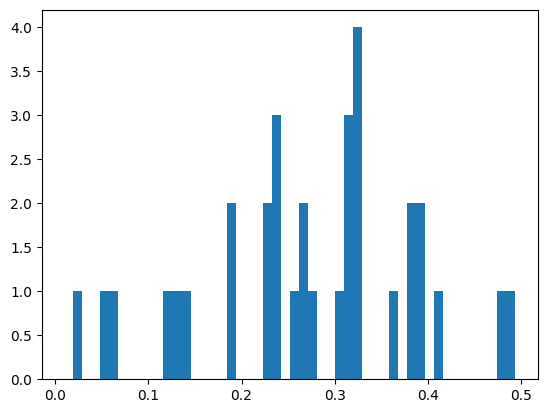

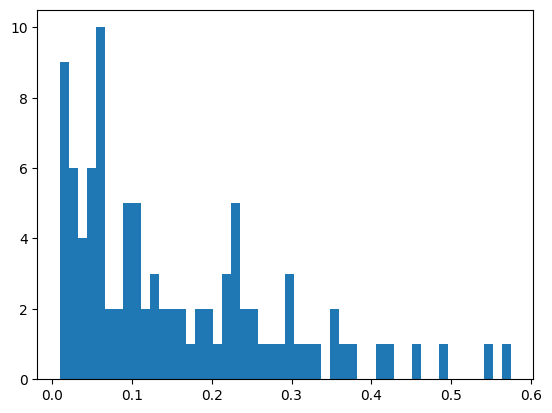

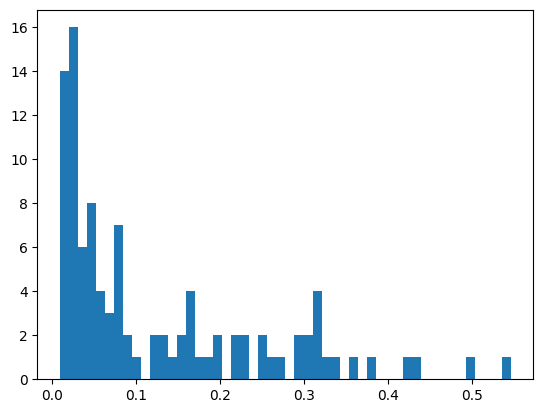

In [ ]:
for i in range(10,20):
    plt.hist(dataset[i]["coords"][:,3].flatten(), range = (0.01,torch.max(dataset[i]["coords"][:,3]).item()), bins = 50)
    plt.show()

In [ ]:
def f(x,y):
    return x+y
kwargs = {"x" : 3, "y": 4}
f(**kwargs)

7